30 30


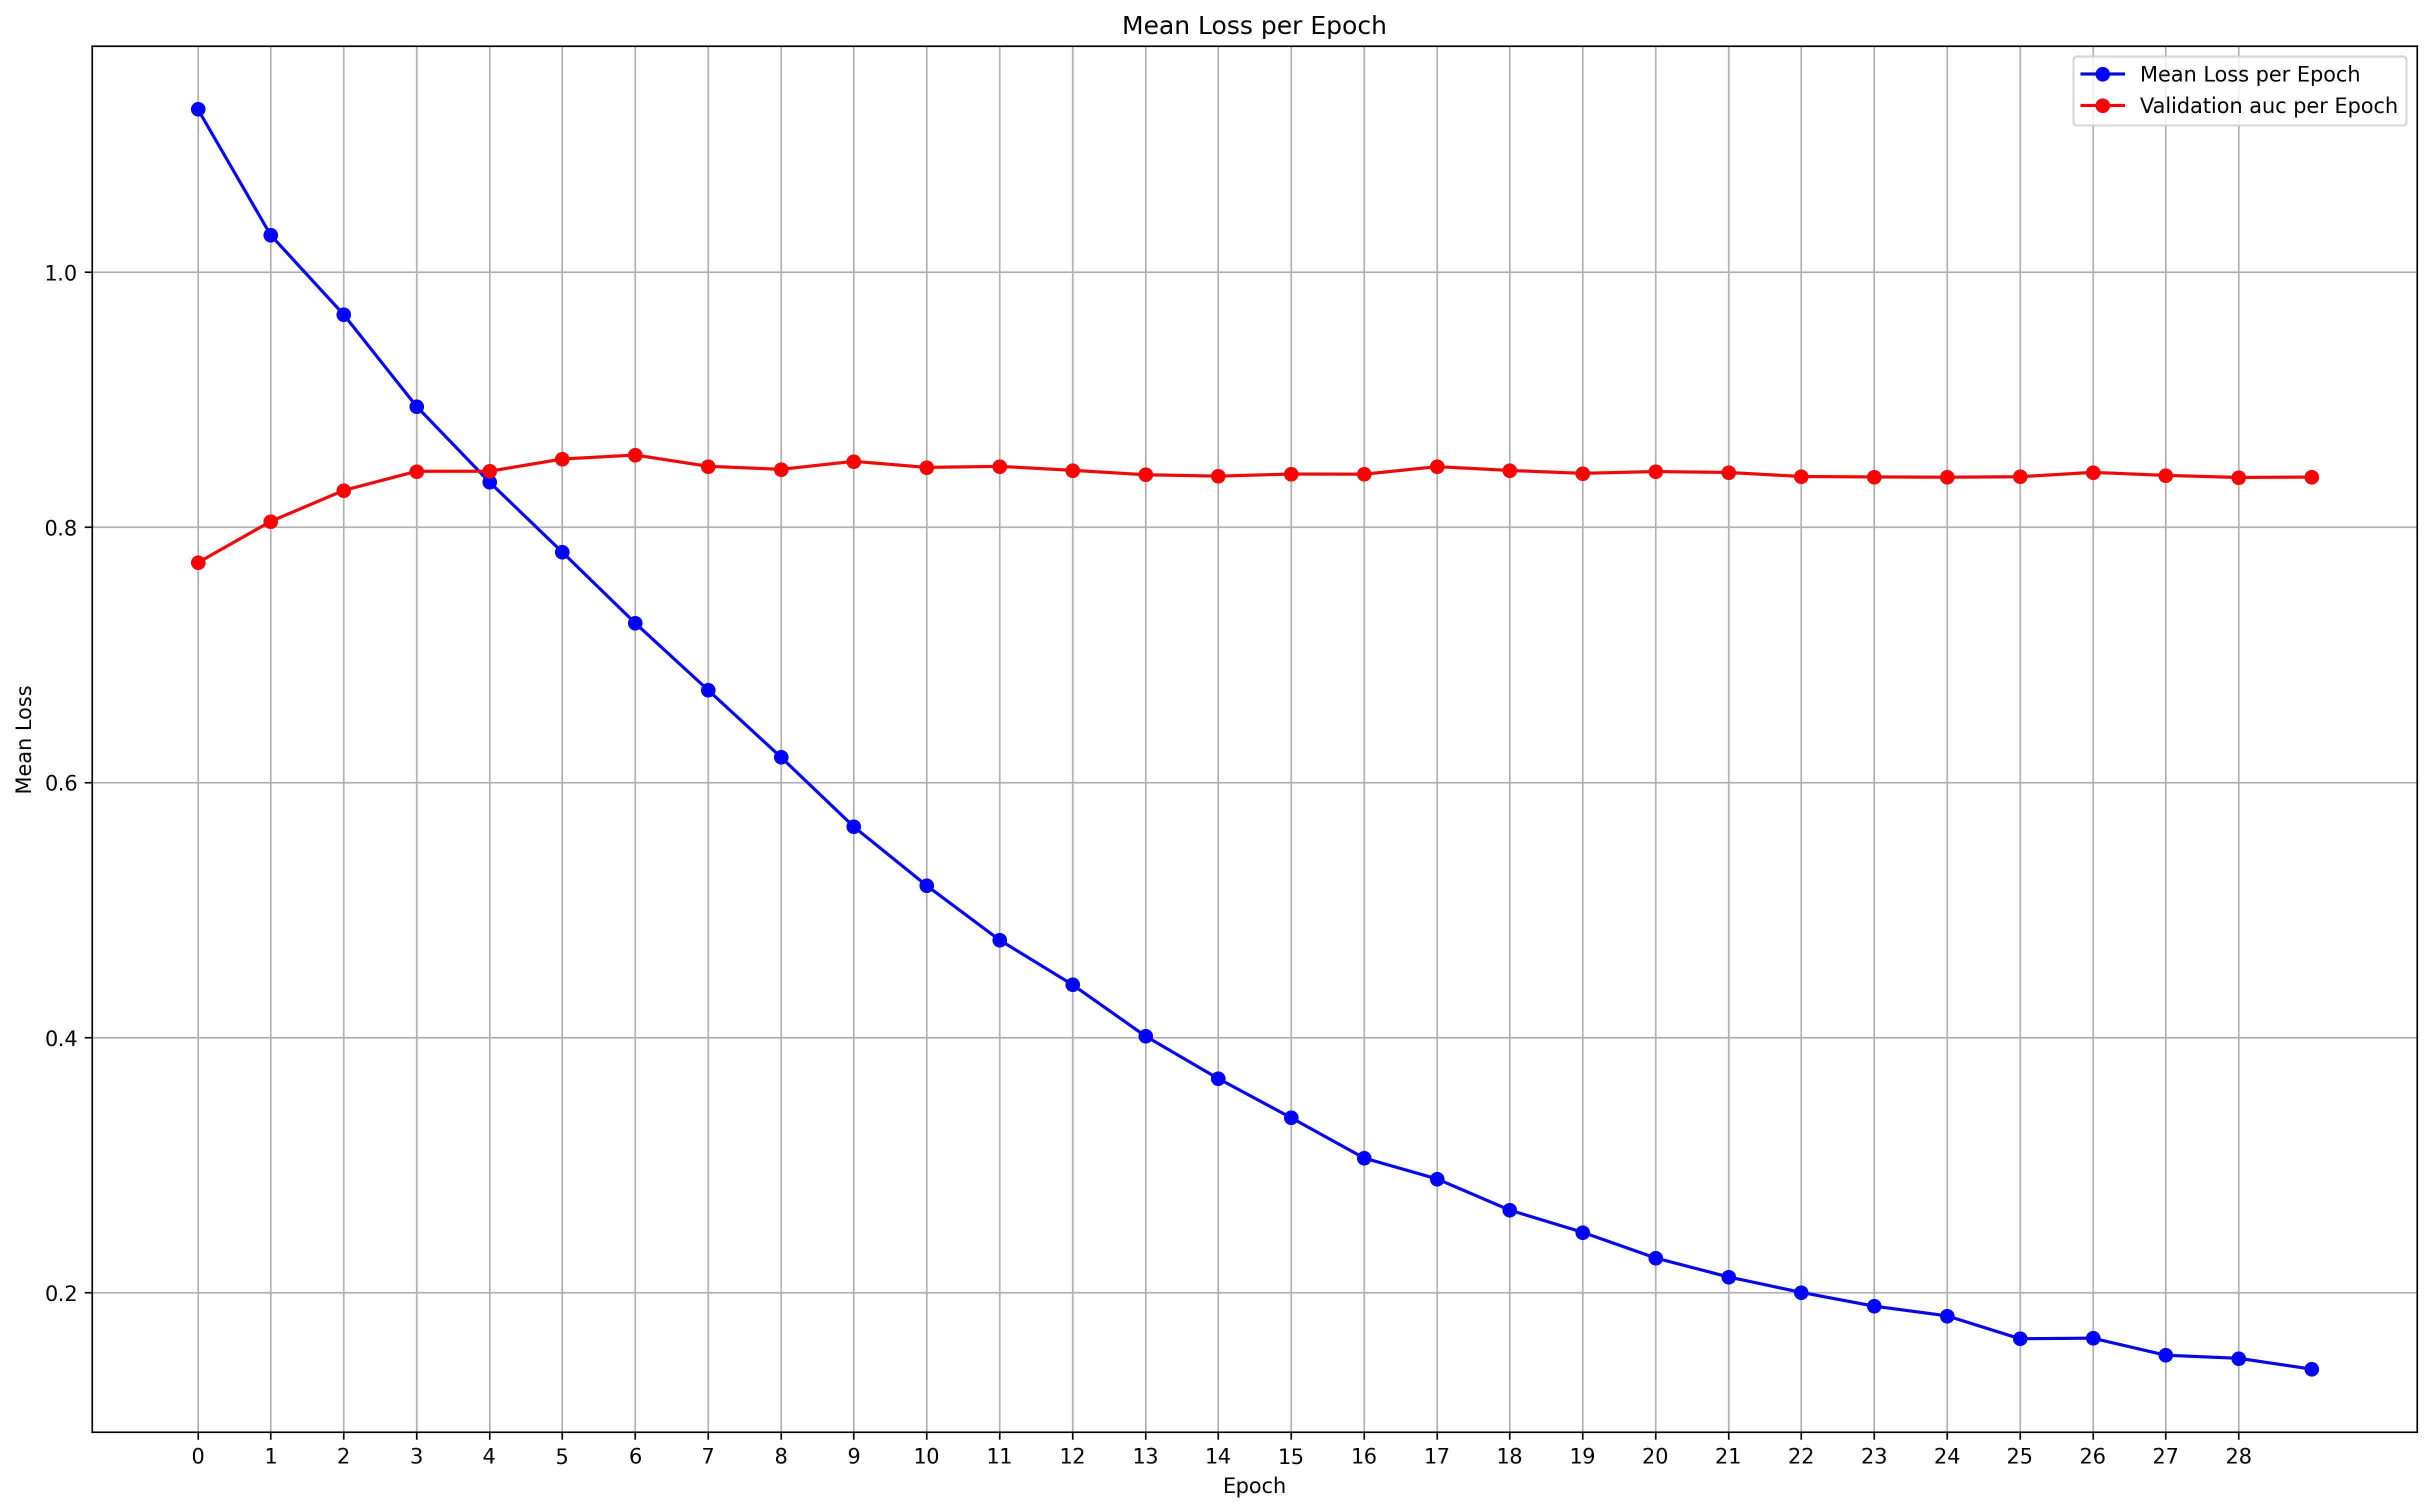

In [5]:
import re
import matplotlib.pyplot as plt

with open('/home/fuli/my_code/git/chemprop/checkpoints/att/Cell/Cell_1_model/verbose.log', 'r')as f:
    epoch_losses = {}
    auc_list = []
    current_epoch = None
    for line in f.readlines():
        epoch_match = re.match(r'Epoch (\d+)', line)
        loss_match = re.match(r'Loss = ([-+]?[0-9]*\.?[0-9]+[eE][-+]?[0-9]+)', line)
        auc_match = re.match(r'Validation auc = ([0-9]+\.[0-9]+)', line)
        if epoch_match:
            current_epoch = int(epoch_match.group(1))
            epoch_losses[current_epoch] = []
        elif loss_match and current_epoch is not None:
            try:
                epoch_losses[current_epoch].append(float(loss_match.group(1)))
            except ValueError:
                print('Error parsing loss value on line: {}'.format(line), f'##########{loss_match.group(1)}')
            if float(loss_match.group(1)) > 10:
                print('############',loss_match.group(1), float(loss_match.group(1)))
        elif auc_match is not None:
            auc_list.append(float(auc_match.group(1)))
            

epochs = []
mean_losses = []

for epoch, losses in epoch_losses.items():
    mean_loss = sum(losses) / len(losses)
    epochs.append(epoch)
    mean_losses.append(mean_loss)
    
# 绘制每个Epoch的平均Loss值
last_epoch_losses = epochs[:-1]
print(len(auc_list), len(epoch_losses))
plt.figure(figsize=(20, 12),dpi=300)
plt.plot(epochs, mean_losses, marker='o', linestyle='-', color='b', label='Mean Loss per Epoch')
plt.plot(epochs, auc_list, marker='o', linestyle='-', color='r', label='Validation auc per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Mean Loss')
plt.title('Mean Loss per Epoch')
plt.legend()
plt.grid(True)

# 设置X轴的刻度间隔为10
plt.xticks(range(0, len(last_epoch_losses), 1))

plt.show()

############ 4.2623e+02 426.23
############ 3.9961e+03 3996.1
############ 7.7186e+01 77.186
############ 2.6298e+02 262.98
############ 1.1297e+01 11.297
############ 1.0225e+02 102.25
############ 2.3022e+05 230220.0
############ 5.3293e+01 53.293
############ 8.9056e+05 890560.0
############ 1.4314e+01 14.314
############ 3.8104e+01 38.104
############ 7.6175e+01 76.175
############ 1.7303e+03 1730.3
############ 1.2644e+01 12.644
############ 2.6159e+01 26.159
############ 1.1176e+03 1117.6
############ 1.7755e+01 17.755
############ 8.4139e+03 8413.9
############ 8.0894e+02 808.94
############ 1.9003e+02 190.03
############ 6.5123e+04 65123.0
############ 3.1342e+01 31.342
############ 1.5020e+02 150.2
############ 3.6007e+03 3600.7
############ 3.6912e+02 369.12
############ 1.6835e+04 16835.0
############ 3.5492e+01 35.492
############ 2.8939e+05 289390.0
############ 2.1735e+01 21.735
############ 1.2232e+02 122.32
############ 2.3574e+02 235.74
############ 1.2229e+06 1222900.

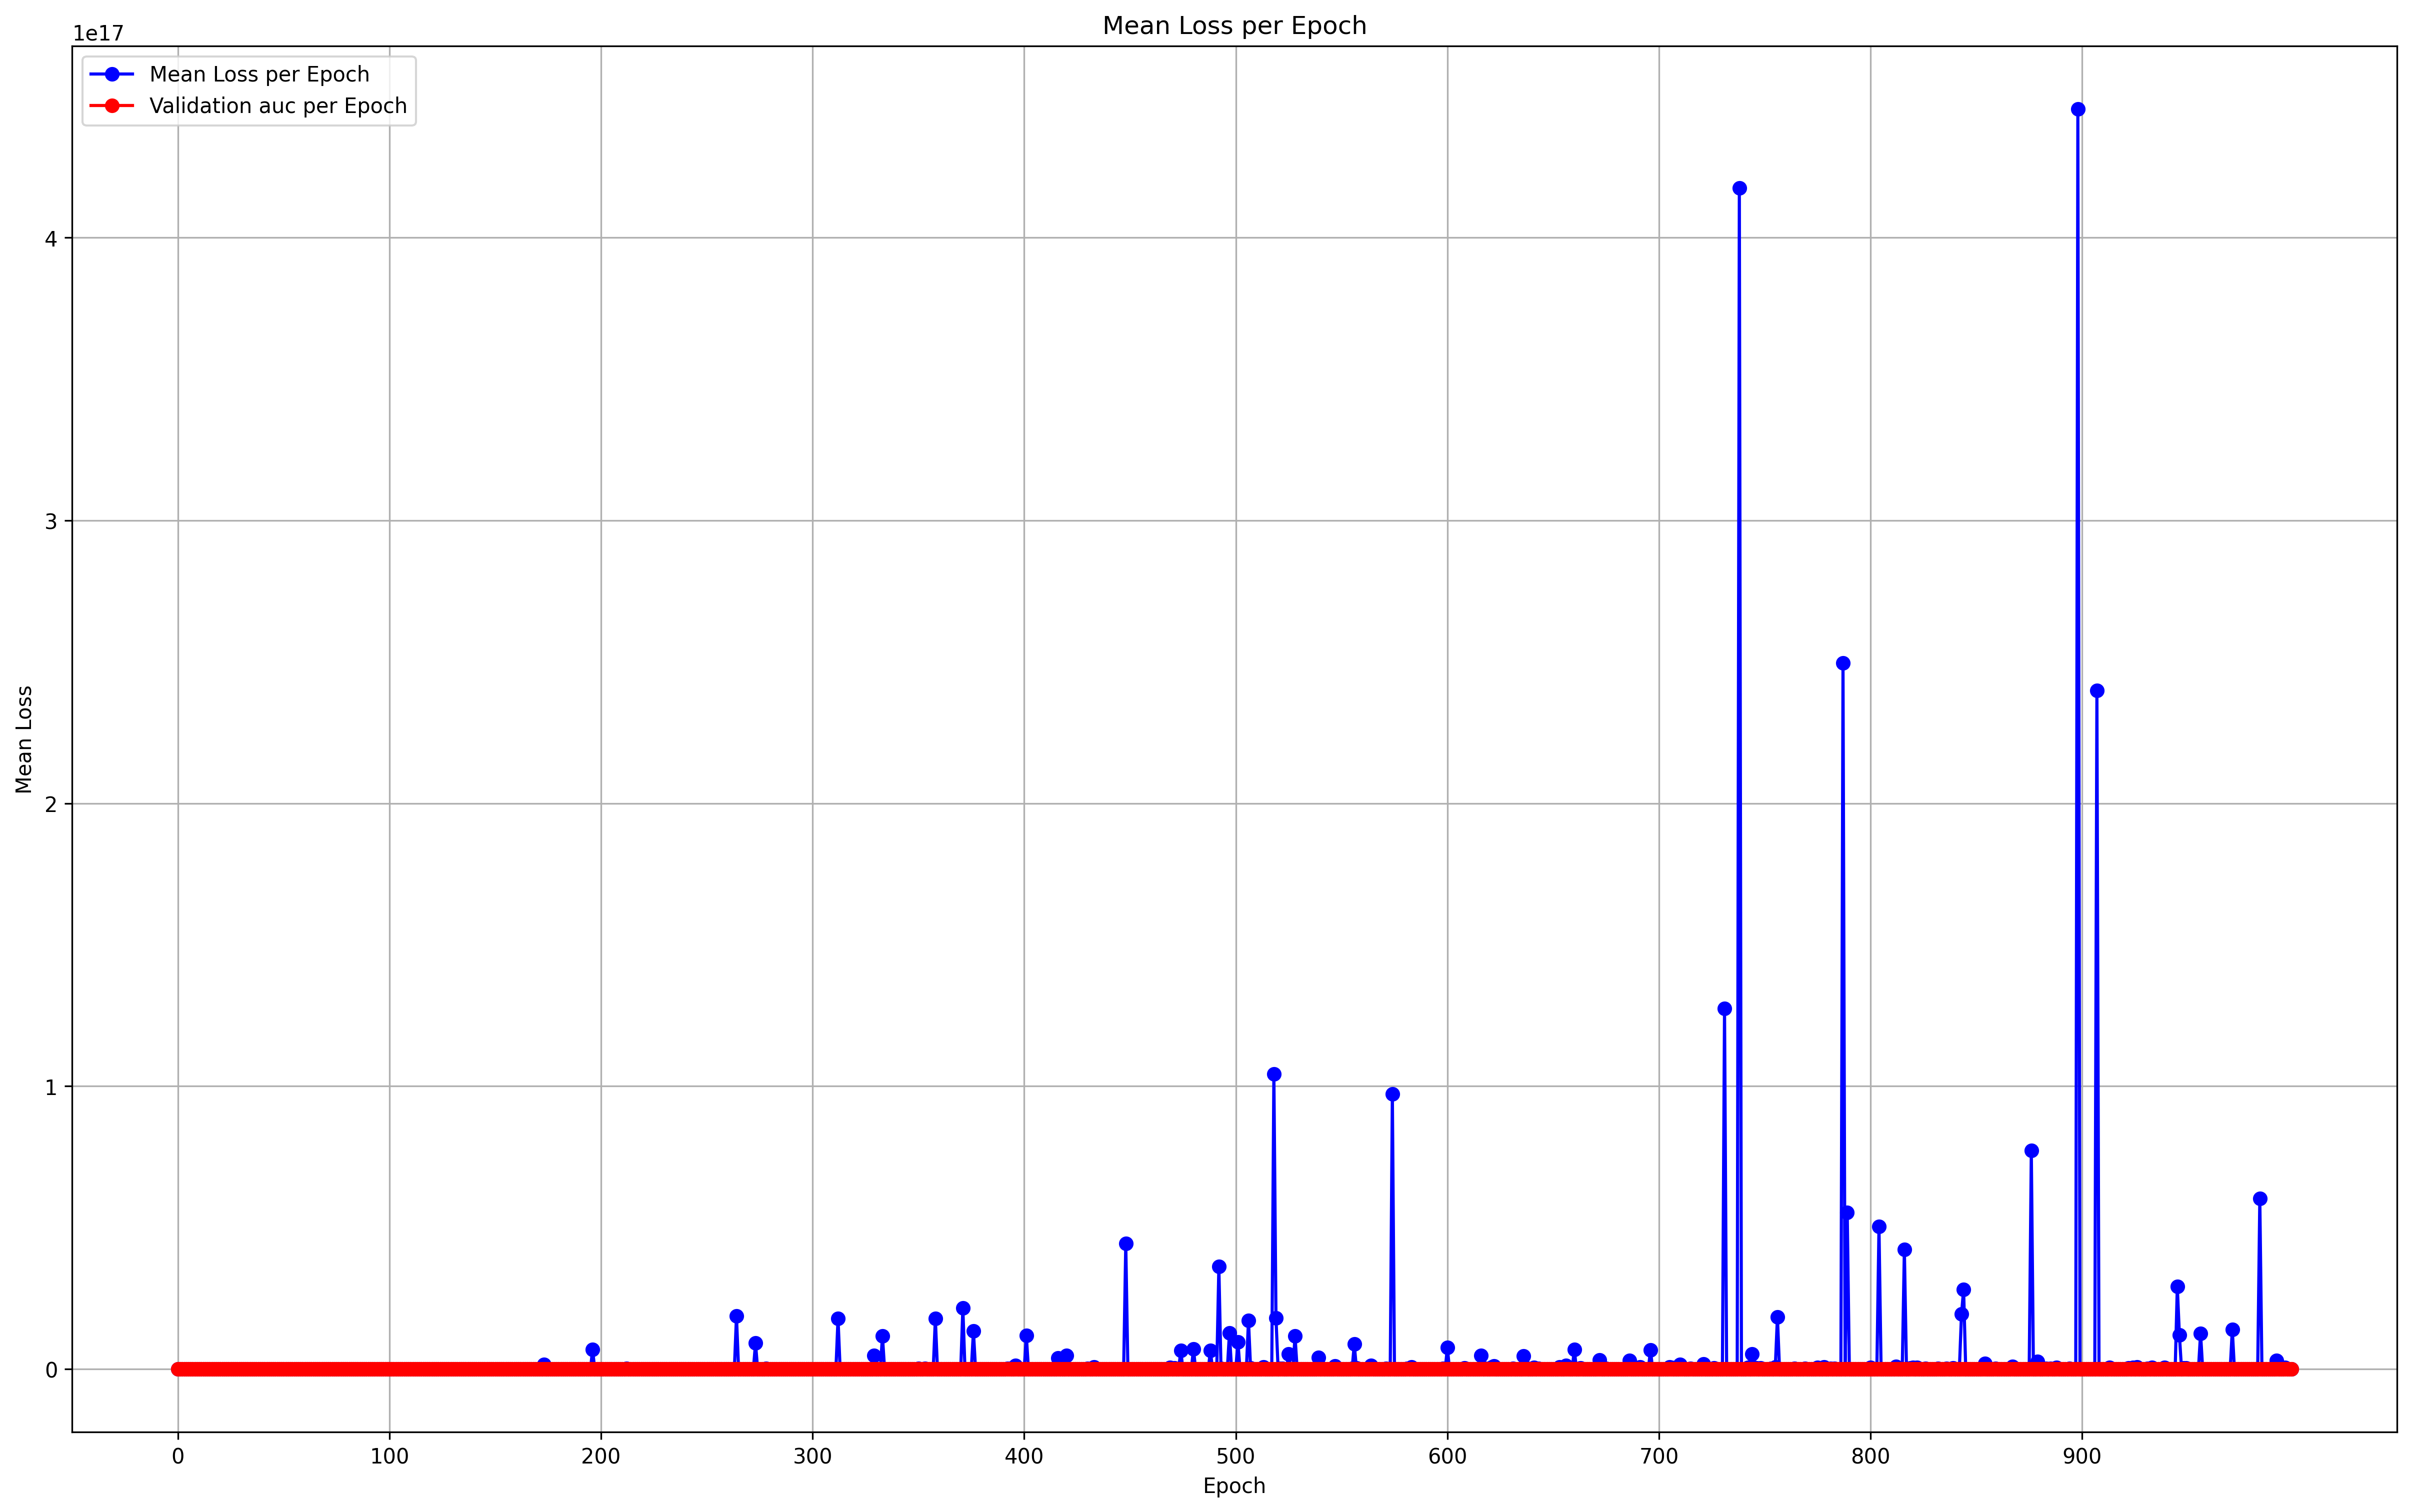

In [9]:
import re
import matplotlib.pyplot as plt

with open('checkpoints/att/Clinical/Clinical_1_model/verbose.log', 'r')as f:
    epoch_losses = {}
    auc_list = []
    current_epoch = None
    for line in f.readlines():
        epoch_match = re.match(r'Epoch (\d+)', line)
        loss_match = re.match(r'Loss = ([-+]?[0-9]*\.?[0-9]+[eE][-+]?[0-9]+)', line)
        auc_match = re.match(r'Validation auc = ([0-9]+\.[0-9]+)', line)
        if epoch_match:
            current_epoch = int(epoch_match.group(1))
            epoch_losses[current_epoch] = []
        elif loss_match and current_epoch is not None:
            try:
                epoch_losses[current_epoch].append(float(loss_match.group(1)))
            except ValueError:
                print('Error parsing loss value on line: {}'.format(line), f'##########{loss_match.group(1)}')
            if float(loss_match.group(1)) > 10:
                print('############',loss_match.group(1), float(loss_match.group(1)))
        elif auc_match is not None:
            auc_list.append(float(auc_match.group(1)))
            

epochs = []
mean_losses = []

for epoch, losses in epoch_losses.items():
    mean_loss = sum(losses) / len(losses)
    epochs.append(epoch)
    mean_losses.append(mean_loss)
    
# 绘制每个Epoch的平均Loss值
last_epoch_losses = epochs[:-1]
print(len(auc_list), len(epoch_losses), auc_list)
plt.figure(figsize=(20, 12),dpi=300)
plt.plot(epochs, mean_losses, marker='o', linestyle='-', color='b', label='Mean Loss per Epoch')
plt.plot(epochs, auc_list, marker='o', linestyle='-', color='r', label='Validation auc per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Mean Loss')
plt.title('Mean Loss per Epoch')
plt.legend()
plt.grid(True)

# 设置X轴的刻度间隔为10
plt.xticks(range(0, len(last_epoch_losses), 100))

plt.show()

30 30 [0.795954, 0.802191, 0.820817, 0.838882, 0.851654, 0.858977, 0.855811, 0.865554, 0.867988, 0.868925, 0.87087, 0.865976, 0.871162, 0.880062, 0.874772, 0.880532, 0.881833, 0.880924, 0.882541, 0.88038, 0.88161, 0.879777, 0.87701, 0.879502, 0.881498, 0.87972, 0.880515, 0.880742, 0.883533, 0.880525]


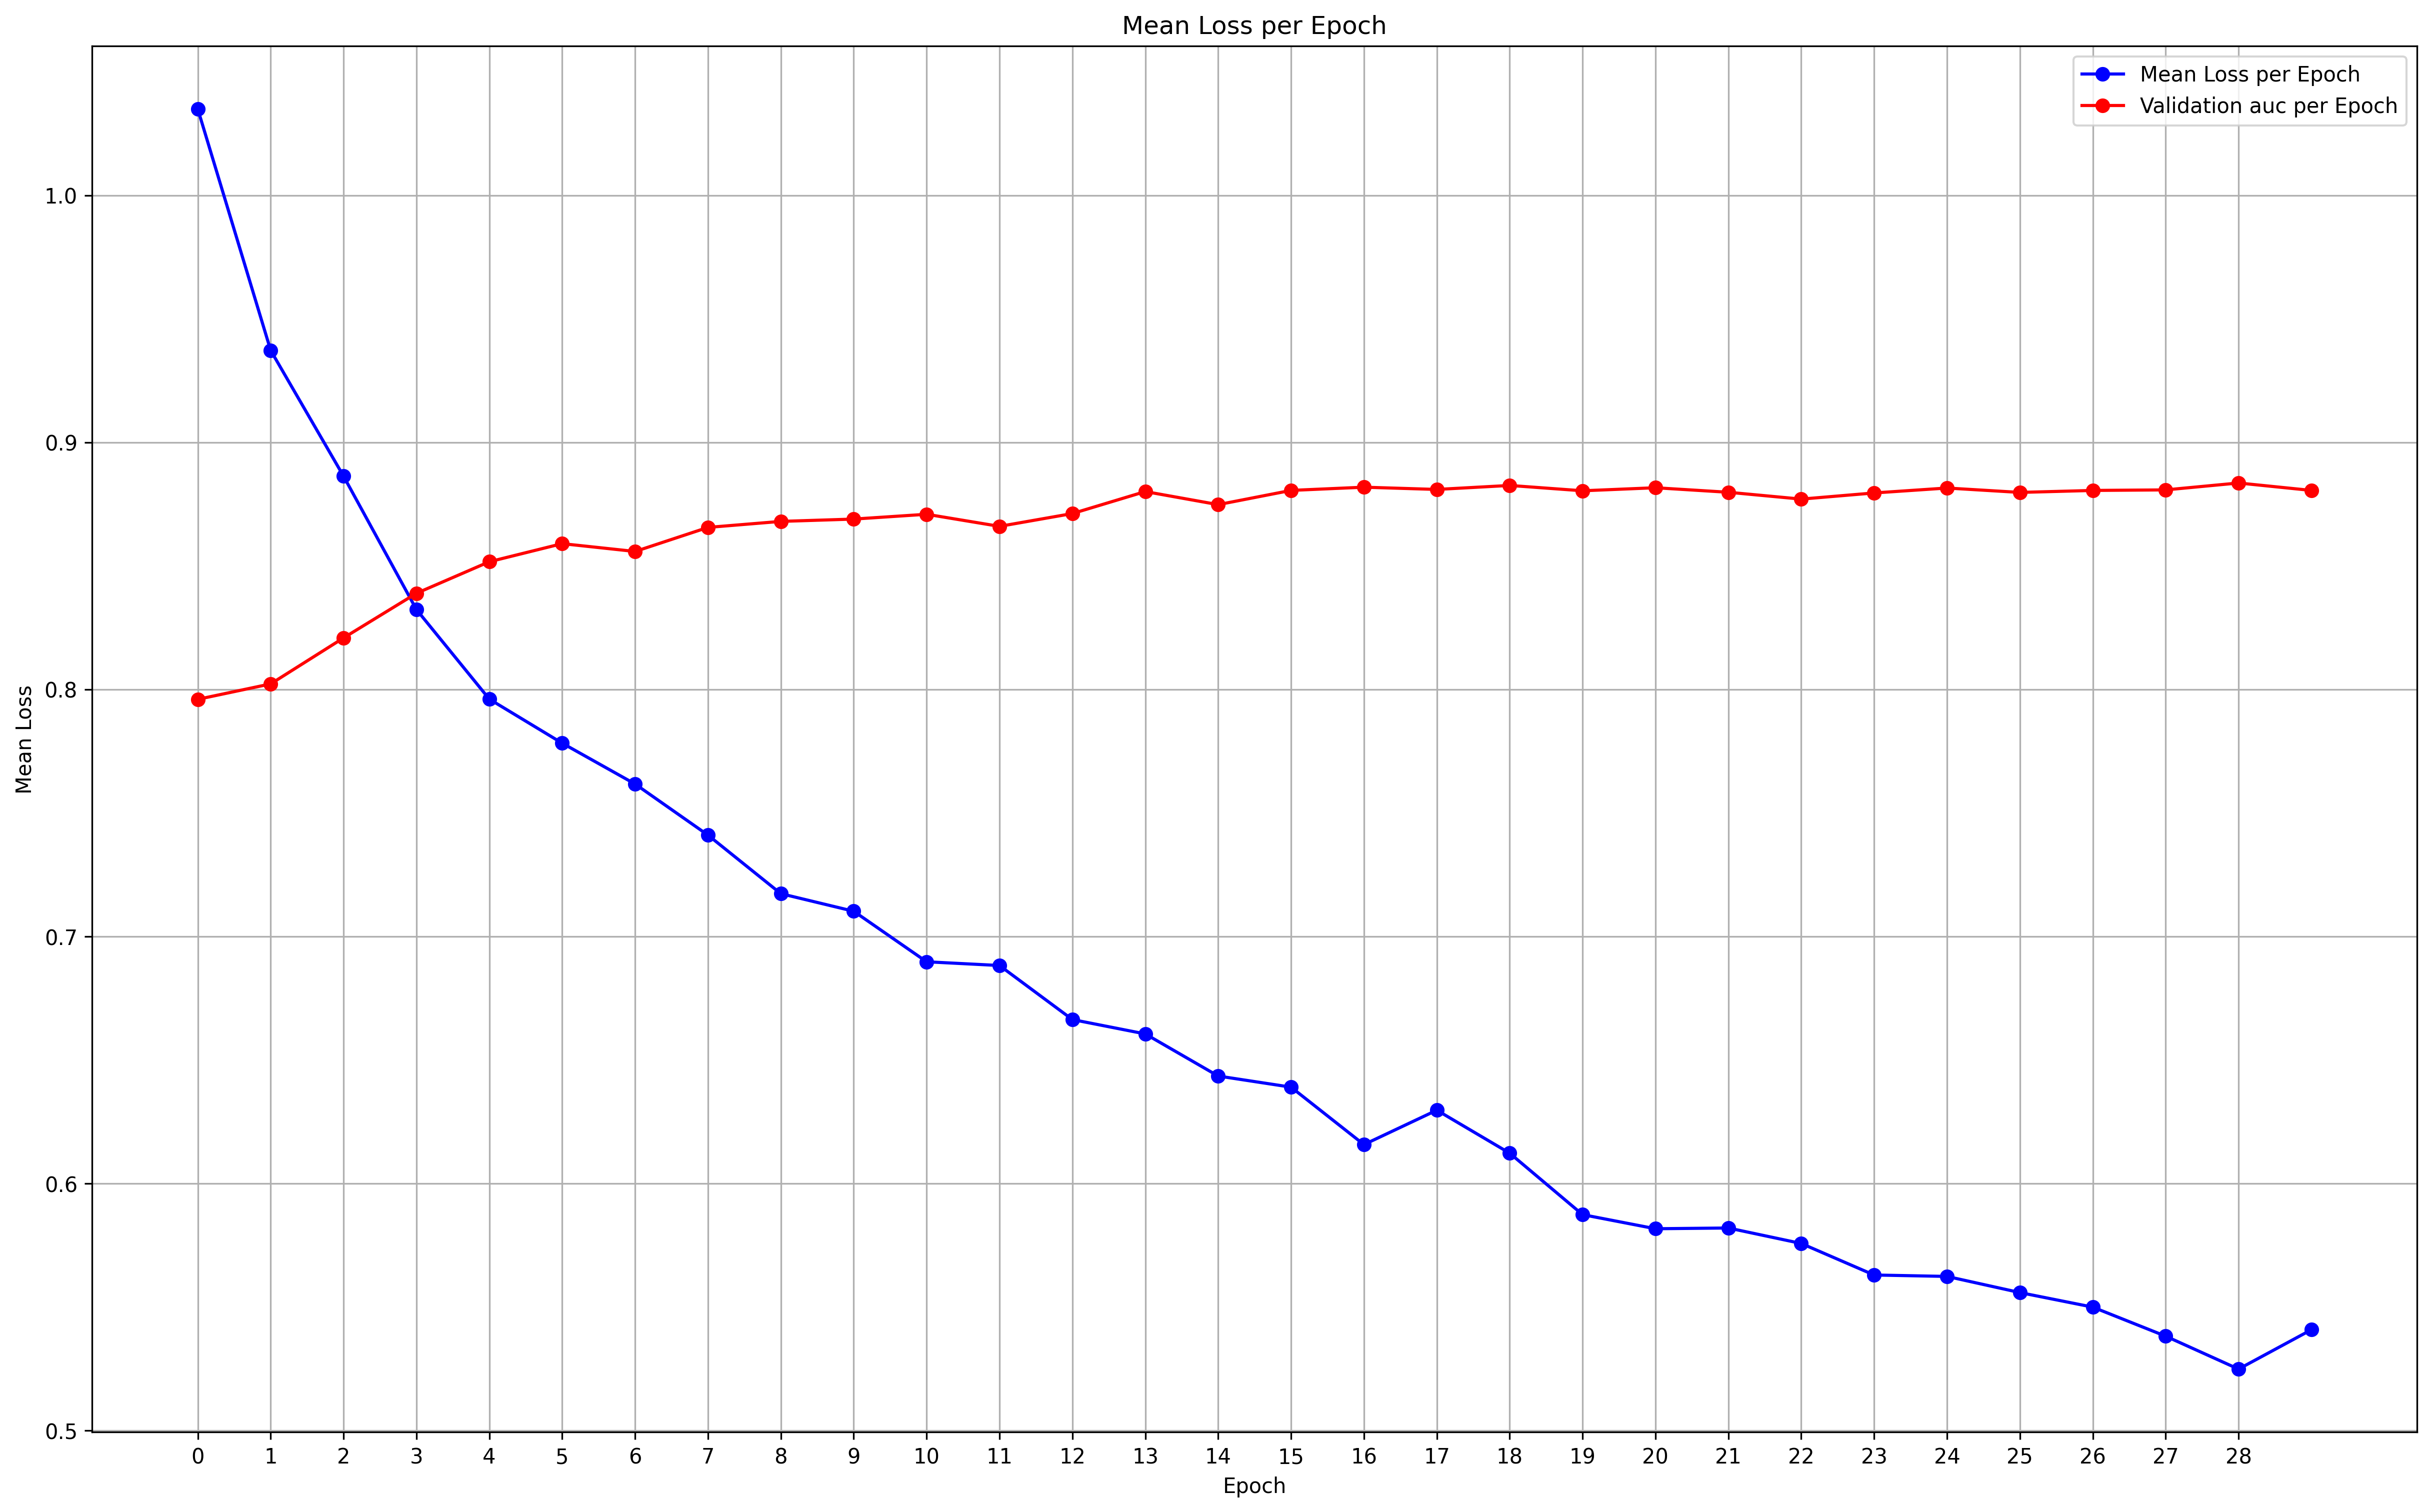

In [11]:
import re
import matplotlib.pyplot as plt

with open('/home/fuli/my_code/git/chemprop/checkpoints/att/Drug/cla/Drug_1_model/verbose.log', 'r')as f:
    epoch_losses = {}
    auc_list = []
    current_epoch = None
    for line in f.readlines():
        epoch_match = re.match(r'Epoch (\d+)', line)
        loss_match = re.match(r'Loss = ([-+]?[0-9]*\.?[0-9]+[eE][-+]?[0-9]+)', line)
        auc_match = re.match(r'Validation auc = ([0-9]+\.[0-9]+)', line)
        if epoch_match:
            current_epoch = int(epoch_match.group(1))
            epoch_losses[current_epoch] = []
        elif loss_match and current_epoch is not None:
            try:
                epoch_losses[current_epoch].append(float(loss_match.group(1)))
            except ValueError:
                print('Error parsing loss value on line: {}'.format(line), f'##########{loss_match.group(1)}')
            if float(loss_match.group(1)) > 10:
                print('############',loss_match.group(1), float(loss_match.group(1)))
        elif auc_match is not None:
            auc_list.append(float(auc_match.group(1)))
            

epochs = []
mean_losses = []

for epoch, losses in epoch_losses.items():
    mean_loss = sum(losses) / len(losses)
    epochs.append(epoch)
    mean_losses.append(mean_loss)
    
# 绘制每个Epoch的平均Loss值
last_epoch_losses = epochs[:-1]
print(len(auc_list), len(epoch_losses), auc_list)
plt.figure(figsize=(20, 12),dpi=300)
plt.plot(epochs, mean_losses, marker='o', linestyle='-', color='b', label='Mean Loss per Epoch')
plt.plot(epochs, auc_list, marker='o', linestyle='-', color='r', label='Validation auc per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Mean Loss')
plt.title('Mean Loss per Epoch')
plt.legend()
plt.grid(True)

# 设置X轴的刻度间隔为10
plt.xticks(range(0, len(last_epoch_losses), 1))

plt.show()

100 100 [0.738319, 0.809815, 0.833621, 0.840785, 0.839617, 0.836512, 0.828503, 0.848865, 0.848907, 0.857154, 0.857553, 0.86424, 0.845414, 0.854698, 0.853709, 0.849809, 0.84598, 0.84858, 0.858612, 0.854343, 0.85906, 0.85526, 0.857152, 0.857305, 0.843872, 0.84952, 0.856367, 0.849707, 0.855196, 0.854628, 0.860297, 0.860198, 0.845882, 0.861031, 0.859215, 0.855681, 0.856187, 0.853632, 0.862791, 0.854201, 0.858796, 0.834957, 0.84854, 0.841902, 0.844132, 0.844358, 0.839877, 0.845831, 0.851153, 0.84883, 0.851423, 0.846659, 0.850114, 0.84756, 0.842445, 0.844921, 0.855778, 0.85223, 0.847231, 0.851449, 0.853485, 0.852507, 0.853781, 0.855717, 0.851982, 0.848279, 0.849986, 0.847801, 0.848337, 0.847129, 0.84733, 0.846163, 0.843533, 0.84326, 0.84481, 0.847722, 0.850493, 0.847529, 0.84736, 0.849231, 0.850463, 0.851021, 0.850807, 0.851589, 0.841813, 0.845458, 0.851859, 0.852737, 0.848266, 0.848653, 0.849792, 0.849184, 0.848479, 0.846755, 0.848321, 0.853961, 0.851507, 0.851191, 0.850244, 0.848561]


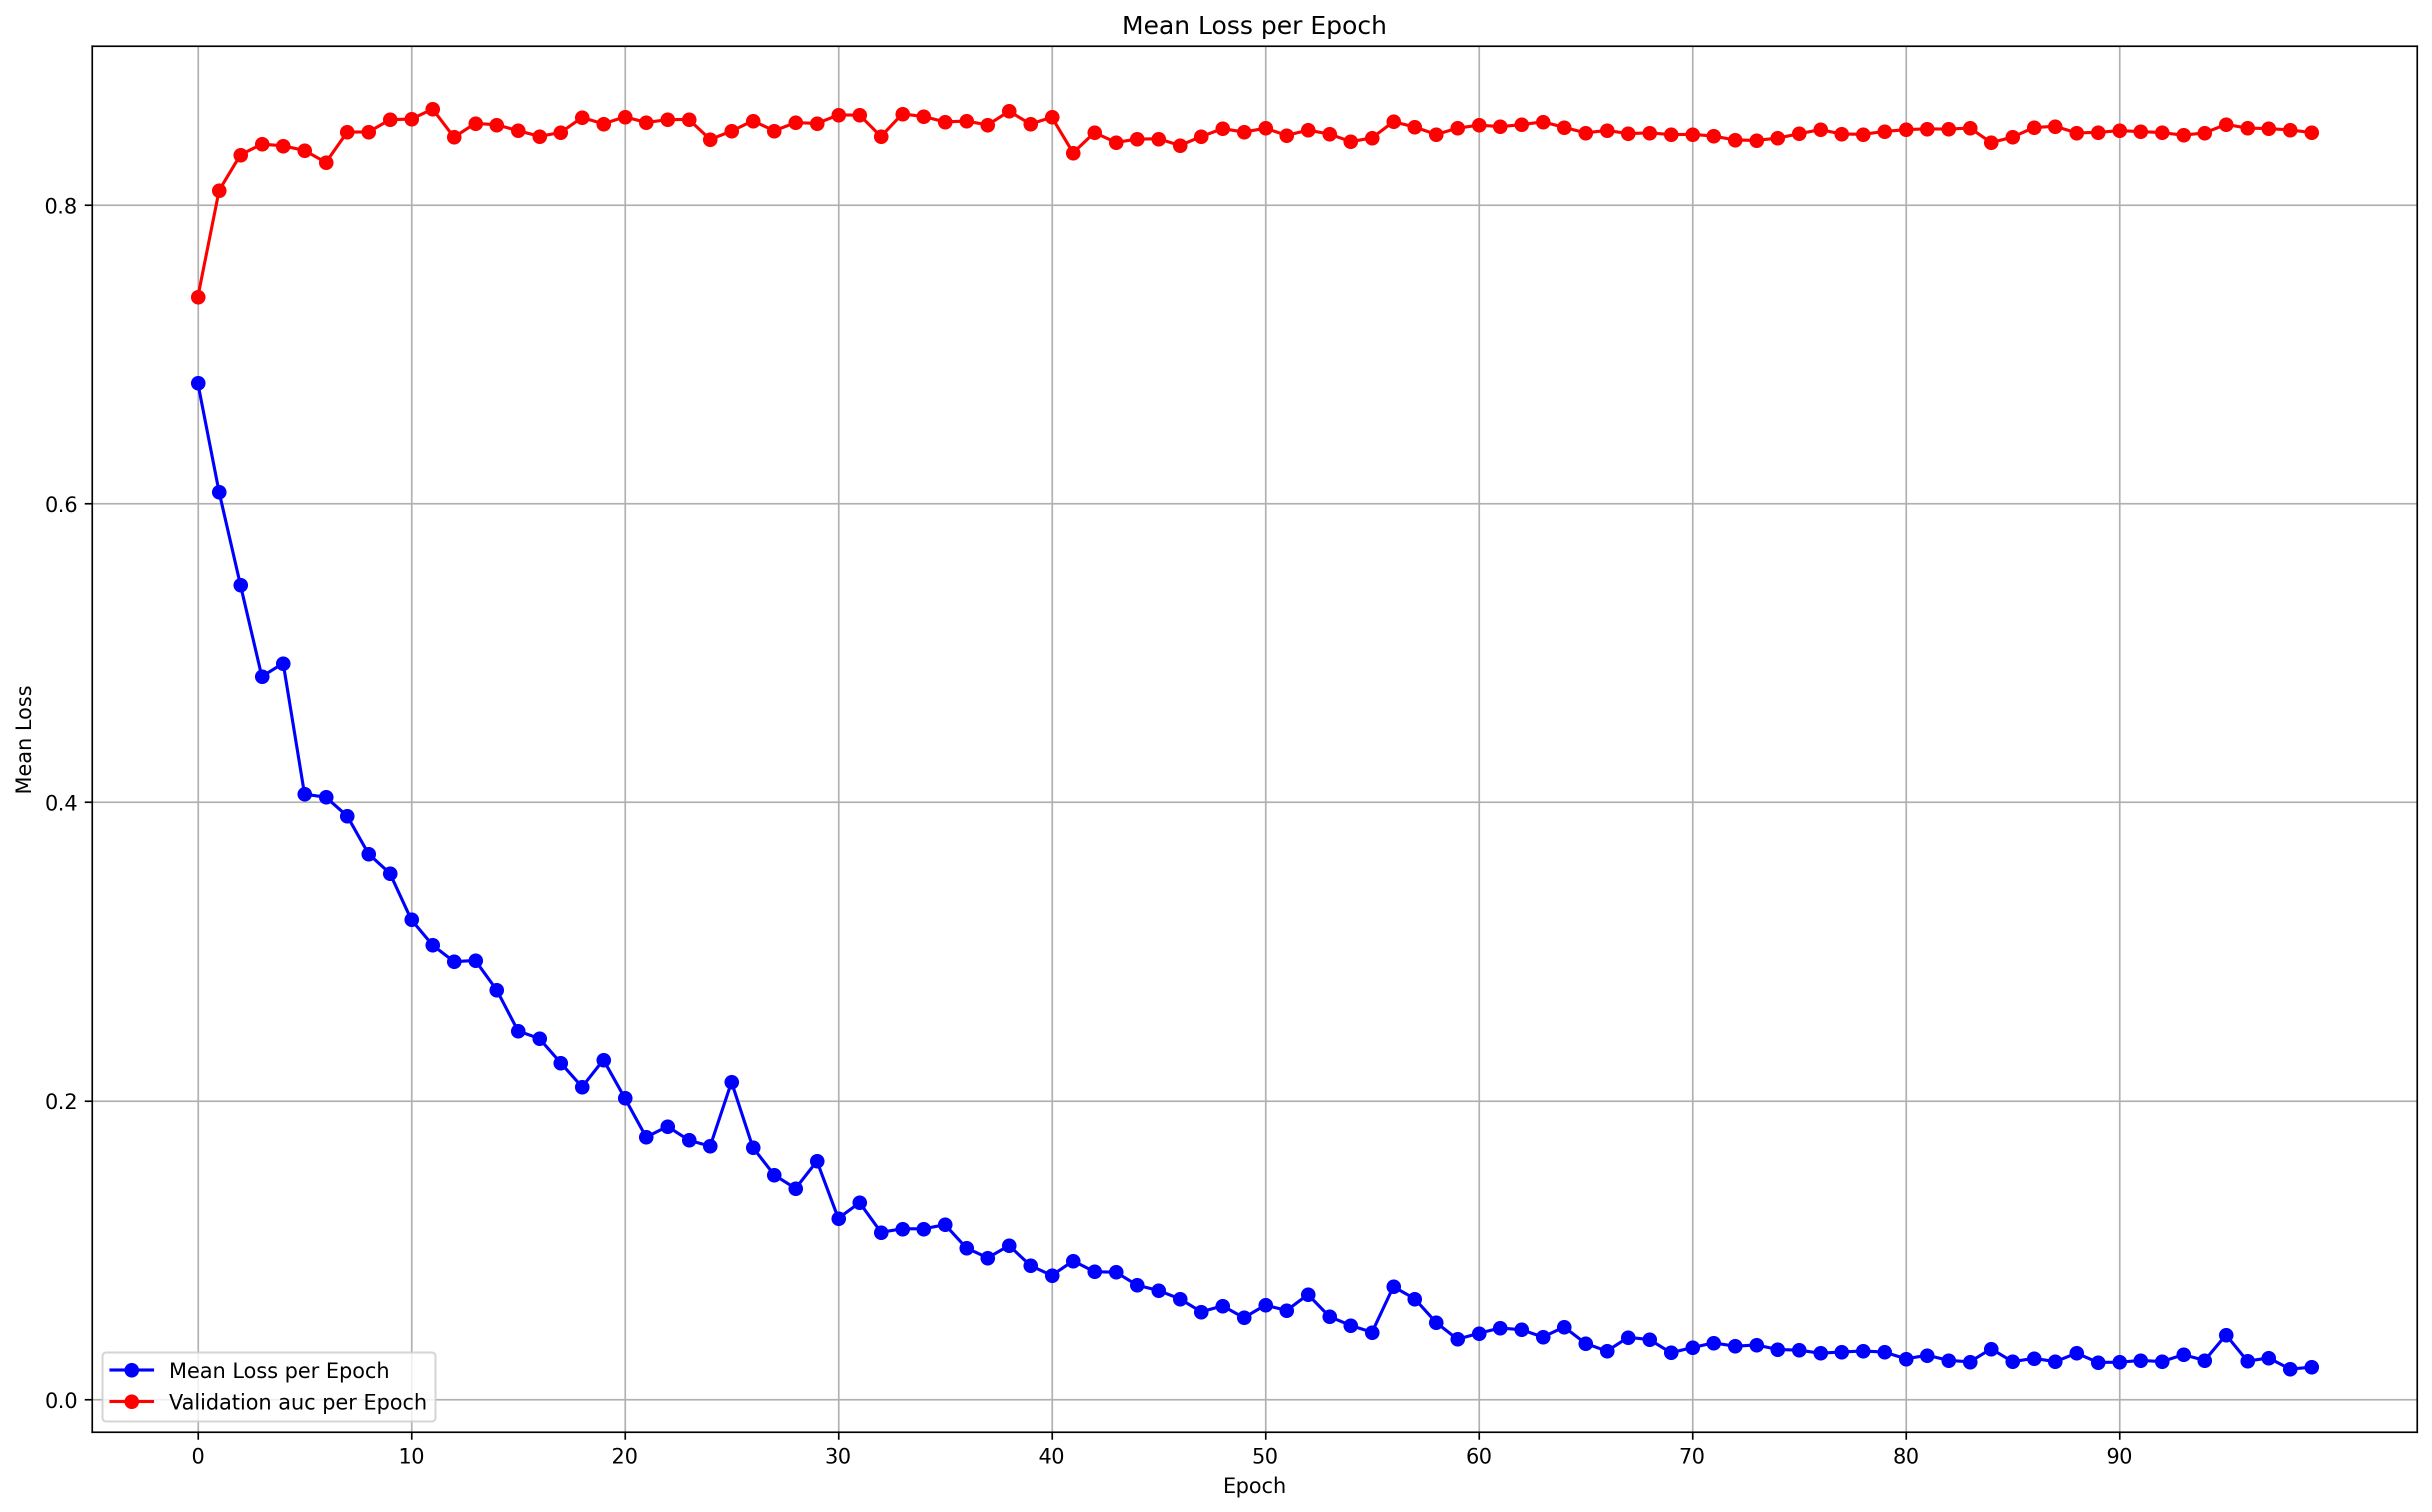

In [13]:
import re
import matplotlib.pyplot as plt

with open('checkpoints/att/Environments/cla/Environments_1_model/verbose.log', 'r')as f:
    epoch_losses = {}
    auc_list = []
    current_epoch = None
    for line in f.readlines():
        epoch_match = re.match(r'Epoch (\d+)', line)
        loss_match = re.match(r'Loss = ([-+]?[0-9]*\.?[0-9]+[eE][-+]?[0-9]+)', line)
        auc_match = re.match(r'Validation auc = ([0-9]+\.[0-9]+)', line)
        if epoch_match:
            current_epoch = int(epoch_match.group(1))
            epoch_losses[current_epoch] = []
        elif loss_match and current_epoch is not None:
            try:
                epoch_losses[current_epoch].append(float(loss_match.group(1)))
            except ValueError:
                print('Error parsing loss value on line: {}'.format(line), f'##########{loss_match.group(1)}')
            if float(loss_match.group(1)) > 10:
                print('############',loss_match.group(1), float(loss_match.group(1)))
        elif auc_match is not None:
            auc_list.append(float(auc_match.group(1)))
            

epochs = []
mean_losses = []

for epoch, losses in epoch_losses.items():
    mean_loss = sum(losses) / len(losses)
    epochs.append(epoch)
    mean_losses.append(mean_loss)
    
# 绘制每个Epoch的平均Loss值
last_epoch_losses = epochs[:-1]
print(len(auc_list), len(epoch_losses), auc_list)
plt.figure(figsize=(20, 12),dpi=300)
plt.plot(epochs, mean_losses, marker='o', linestyle='-', color='b', label='Mean Loss per Epoch')
plt.plot(epochs, auc_list, marker='o', linestyle='-', color='r', label='Validation auc per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Mean Loss')
plt.title('Mean Loss per Epoch')
plt.legend()
plt.grid(True)

# 设置X轴的刻度间隔为10
plt.xticks(range(0, len(last_epoch_losses), 10))

plt.show()

############ 1.2743e+01 12.743
############ 1.2404e+01 12.404
############ 2.9628e+01 29.628
############ 1.3163e+02 131.63
############ 2.6431e+01 26.431
############ 1.3437e+02 134.37
############ 3.4552e+01 34.552
############ 1.1451e+01 11.451
############ 1.1567e+01 11.567
1000 1000 [0.736145, 0.755544, 0.770949, 0.788859, 0.794399, 0.807313, 0.817978, 0.823902, 0.831857, 0.828902, 0.832272, 0.829807, 0.835762, 0.836219, 0.838237, 0.836844, 0.842322, 0.838885, 0.839906, 0.840035, 0.837932, 0.84303, 0.837267, 0.838814, 0.841911, 0.836619, 0.841825, 0.833773, 0.828886, 0.832958, 0.836013, 0.839887, 0.839728, 0.844457, 0.832352, 0.834264, 0.839966, 0.834274, 0.839488, 0.835612, 0.83277, 0.839659, 0.840842, 0.832088, 0.834833, 0.843743, 0.836869, 0.837631, 0.836779, 0.836146, 0.830802, 0.834662, 0.838237, 0.836688, 0.837629, 0.836163, 0.832981, 0.838224, 0.840758, 0.840536, 0.840232, 0.83376, 0.834702, 0.830729, 0.841267, 0.826553, 0.832851, 0.836316, 0.836816, 0.840448, 0.830321, 0.8

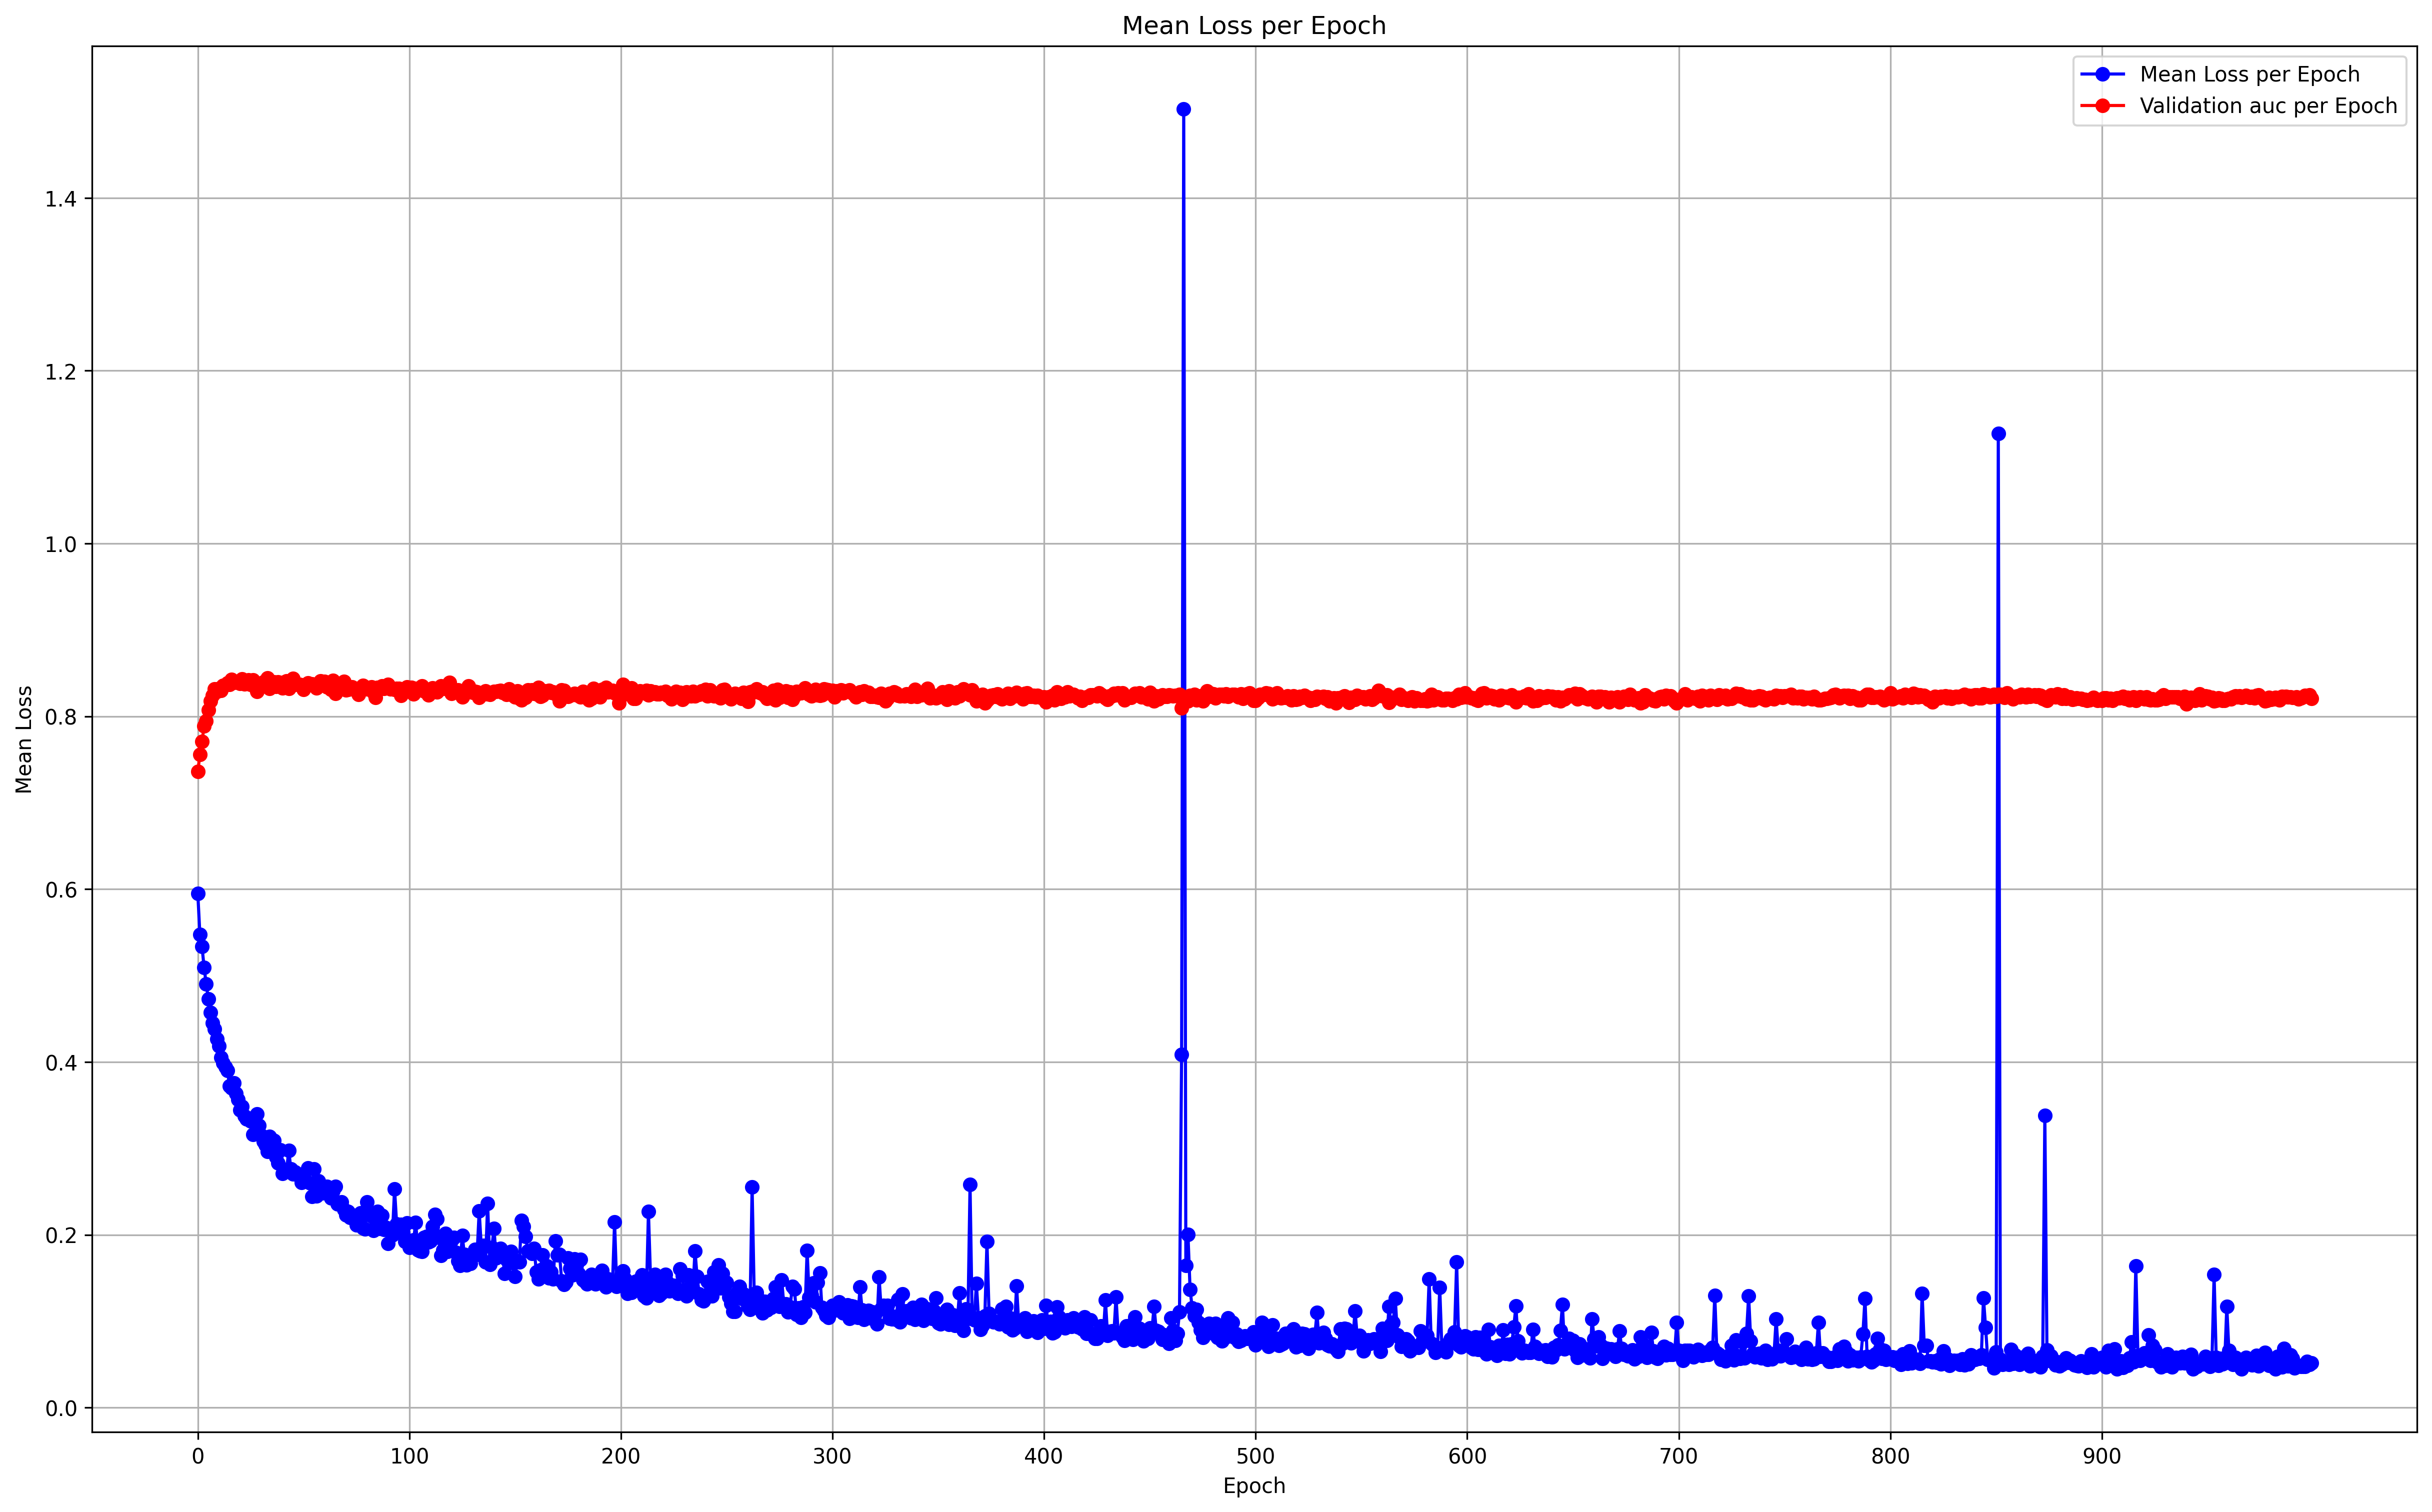

In [15]:
import re
import matplotlib.pyplot as plt

with open('checkpoints/att/Organ/Organ_1_model/verbose.log', 'r')as f:
    epoch_losses = {}
    auc_list = []
    current_epoch = None
    for line in f.readlines():
        epoch_match = re.match(r'Epoch (\d+)', line)
        loss_match = re.match(r'Loss = ([-+]?[0-9]*\.?[0-9]+[eE][-+]?[0-9]+)', line)
        auc_match = re.match(r'Validation auc = ([0-9]+\.[0-9]+)', line)
        if epoch_match:
            current_epoch = int(epoch_match.group(1))
            epoch_losses[current_epoch] = []
        elif loss_match and current_epoch is not None:
            try:
                epoch_losses[current_epoch].append(float(loss_match.group(1)))
            except ValueError:
                print('Error parsing loss value on line: {}'.format(line), f'##########{loss_match.group(1)}')
            if float(loss_match.group(1)) > 10:
                print('############',loss_match.group(1), float(loss_match.group(1)))
        elif auc_match is not None:
            auc_list.append(float(auc_match.group(1)))
            

epochs = []
mean_losses = []

for epoch, losses in epoch_losses.items():
    mean_loss = sum(losses) / len(losses)
    epochs.append(epoch)
    mean_losses.append(mean_loss)
    
# 绘制每个Epoch的平均Loss值
last_epoch_losses = epochs[:-1]
print(len(auc_list), len(epoch_losses), auc_list)
plt.figure(figsize=(20, 12),dpi=300)
plt.plot(epochs, mean_losses, marker='o', linestyle='-', color='b', label='Mean Loss per Epoch')
plt.plot(epochs, auc_list, marker='o', linestyle='-', color='r', label='Validation auc per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Mean Loss')
plt.title('Mean Loss per Epoch')
plt.legend()
plt.grid(True)

# 设置X轴的刻度间隔为10
plt.xticks(range(0, len(last_epoch_losses), 100))

plt.show()

############ 3.6557e+01 36.557
############ 4.7360e+02 473.6
############ 4.6437e+01 46.437
############ 1.2388e+01 12.388
############ 4.2235e+01 42.235
############ 1.0356e+01 10.356
############ 2.2978e+02 229.78
############ 5.6600e+02 566.0
############ 2.0513e+01 20.513
############ 1.3016e+03 1301.6
############ 1.1893e+01 11.893
############ 4.1942e+02 419.42
############ 1.8141e+02 181.41
############ 3.4302e+01 34.302
############ 4.9157e+01 49.157
############ 1.8054e+02 180.54
############ 3.7736e+01 37.736
############ 8.2105e+01 82.105
############ 1.3474e+02 134.74
############ 1.7265e+01 17.265
############ 2.0302e+01 20.302
############ 7.4135e+01 74.135
############ 1.1323e+03 1132.3
############ 2.5511e+01 25.511
############ 2.8820e+01 28.82
############ 1.4067e+02 140.67
############ 1.0906e+01 10.906
############ 2.2394e+01 22.394
############ 2.3492e+01 23.492
############ 3.2449e+02 324.49
############ 6.8557e+01 68.557
############ 6.1751e+01 61.751
###########

TypeError: 'float' object cannot be interpreted as an integer

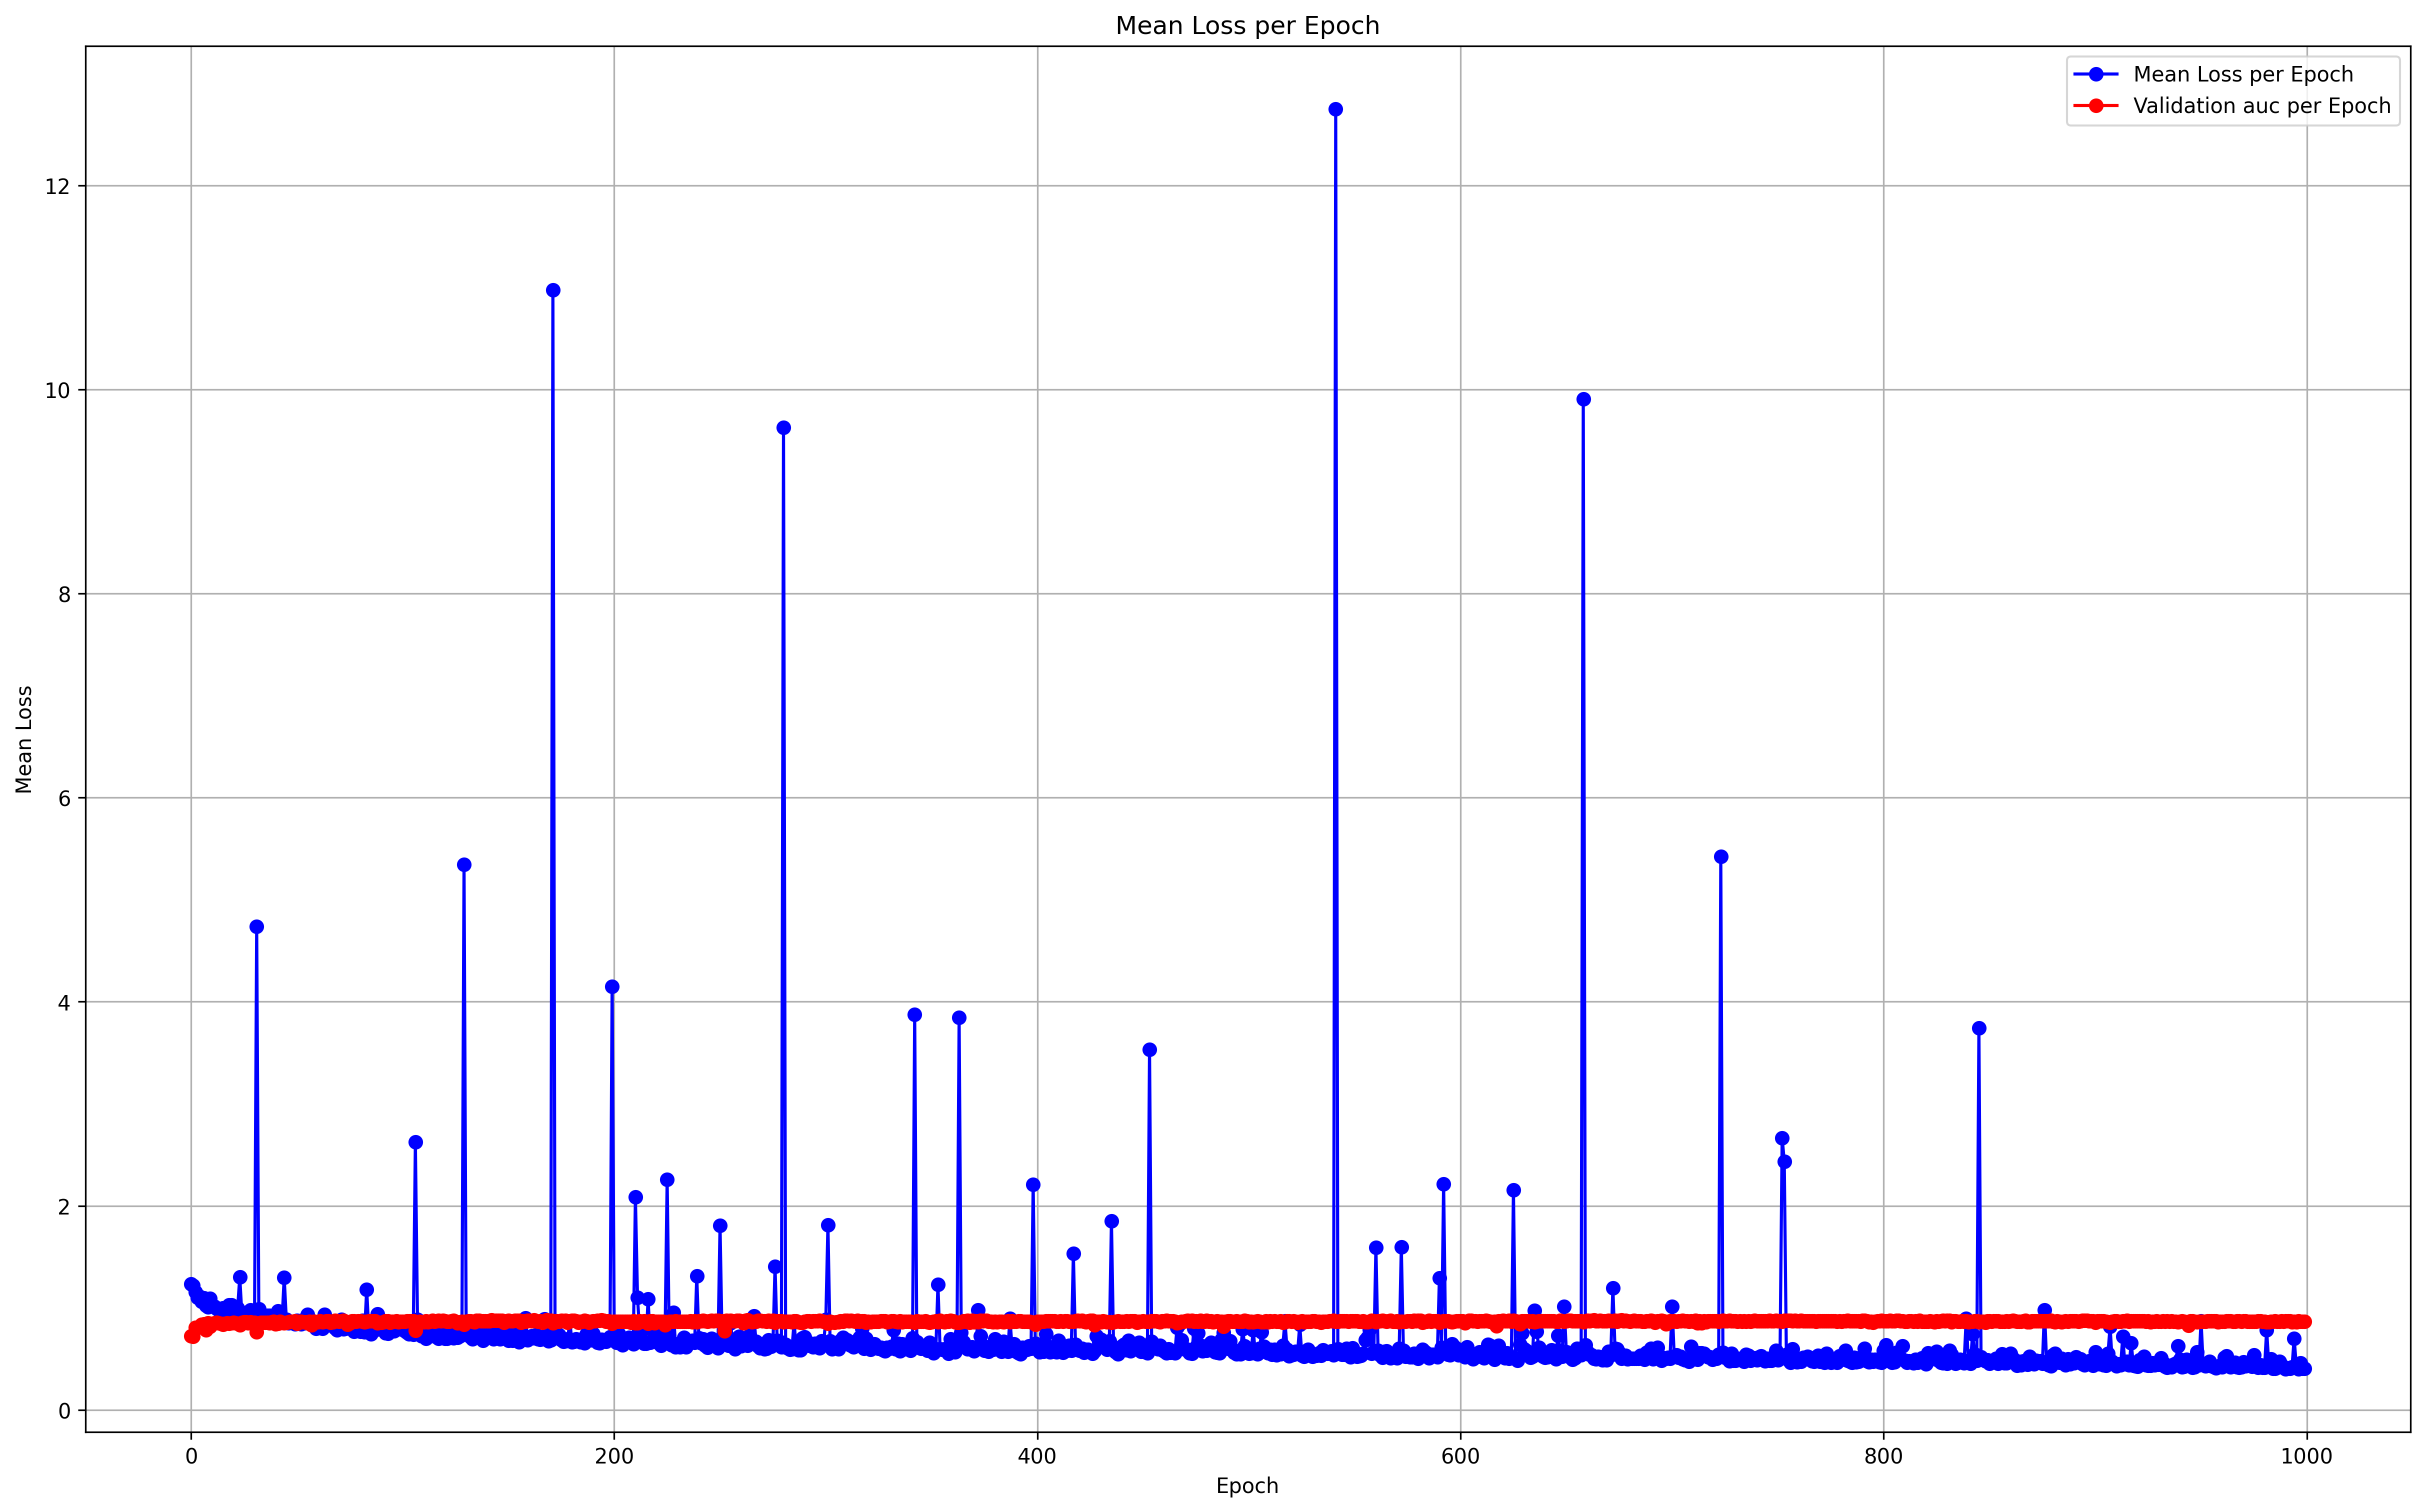

In [20]:
import re
import matplotlib.pyplot as plt

with open('checkpoints/att/Pathway/Pathway_1_model/verbose.log', 'r')as f:
    epoch_losses = {}
    auc_list = []
    current_epoch = None
    for line in f.readlines():
        epoch_match = re.match(r'Epoch (\d+)', line)
        loss_match = re.match(r'Loss = ([-+]?[0-9]*\.?[0-9]+[eE][-+]?[0-9]+)', line)
        auc_match = re.match(r'Validation auc = ([0-9]+\.[0-9]+)', line)
        if epoch_match:
            current_epoch = int(epoch_match.group(1))
            epoch_losses[current_epoch] = []
        elif loss_match and current_epoch is not None:
            try:
                epoch_losses[current_epoch].append(float(loss_match.group(1)))
            except ValueError:
                print('Error parsing loss value on line: {}'.format(line), f'##########{loss_match.group(1)}')
            if float(loss_match.group(1)) > 10:
                print('############',loss_match.group(1), float(loss_match.group(1)))
        elif auc_match is not None:
            auc_list.append(float(auc_match.group(1)))
            

epochs = []
mean_losses = []

for epoch, losses in epoch_losses.items():
    mean_loss = sum(losses) / len(losses)
    epochs.append(epoch)
    mean_losses.append(mean_loss)
    
# 绘制每个Epoch的平均Loss值
last_epoch_losses = epochs[:-1]
print(len(auc_list), len(epoch_losses), auc_list)
plt.figure(figsize=(20, 12),dpi=300)
plt.plot(epochs, mean_losses, marker='o', linestyle='-', color='b', label='Mean Loss per Epoch')
plt.plot(epochs, auc_list, marker='o', linestyle='-', color='r', label='Validation auc per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Mean Loss')
plt.title('Mean Loss per Epoch')
plt.legend()
plt.grid(True)

# 设置X轴的刻度间隔为10
plt.xticks(range(0, len(last_epoch_losses), 100))

plt.show()

############ 1.1105e+02 111.05
############ 1.7152e+01 17.152
############ 1.2446e+01 12.446
############ 1.8800e+01 18.8
############ 2.4017e+03 2401.7
############ 1.0654e+02 106.54
############ 1.6175e+01 16.175
############ 1.0507e+01 10.507
############ 2.0528e+01 20.528
############ 1.4679e+01 14.679
############ 5.3335e+01 53.335
############ 1.3199e+01 13.199
############ 2.5098e+02 250.98
############ 4.2382e+01 42.382
100 100 [0.935729, 0.953245, 0.951229, 0.962441, 0.965888, 0.96885, 0.97207, 0.969342, 0.974246, 0.971824, 0.971422, 0.974297, 0.976157, 0.974879, 0.97855, 0.978074, 0.978651, 0.976567, 0.978744, 0.978955, 0.981075, 0.979749, 0.978836, 0.981212, 0.977533, 0.981504, 0.97996, 0.982122, 0.982058, 0.980388, 0.98044, 0.981308, 0.981955, 0.98154, 0.980328, 0.981694, 0.982483, 0.982888, 0.982456, 0.980962, 0.98235, 0.981704, 0.981506, 0.982629, 0.980065, 0.982951, 0.982098, 0.982294, 0.982564, 0.982419, 0.983082, 0.982808, 0.981011, 0.98346, 0.98303, 0.982969, 0.983449

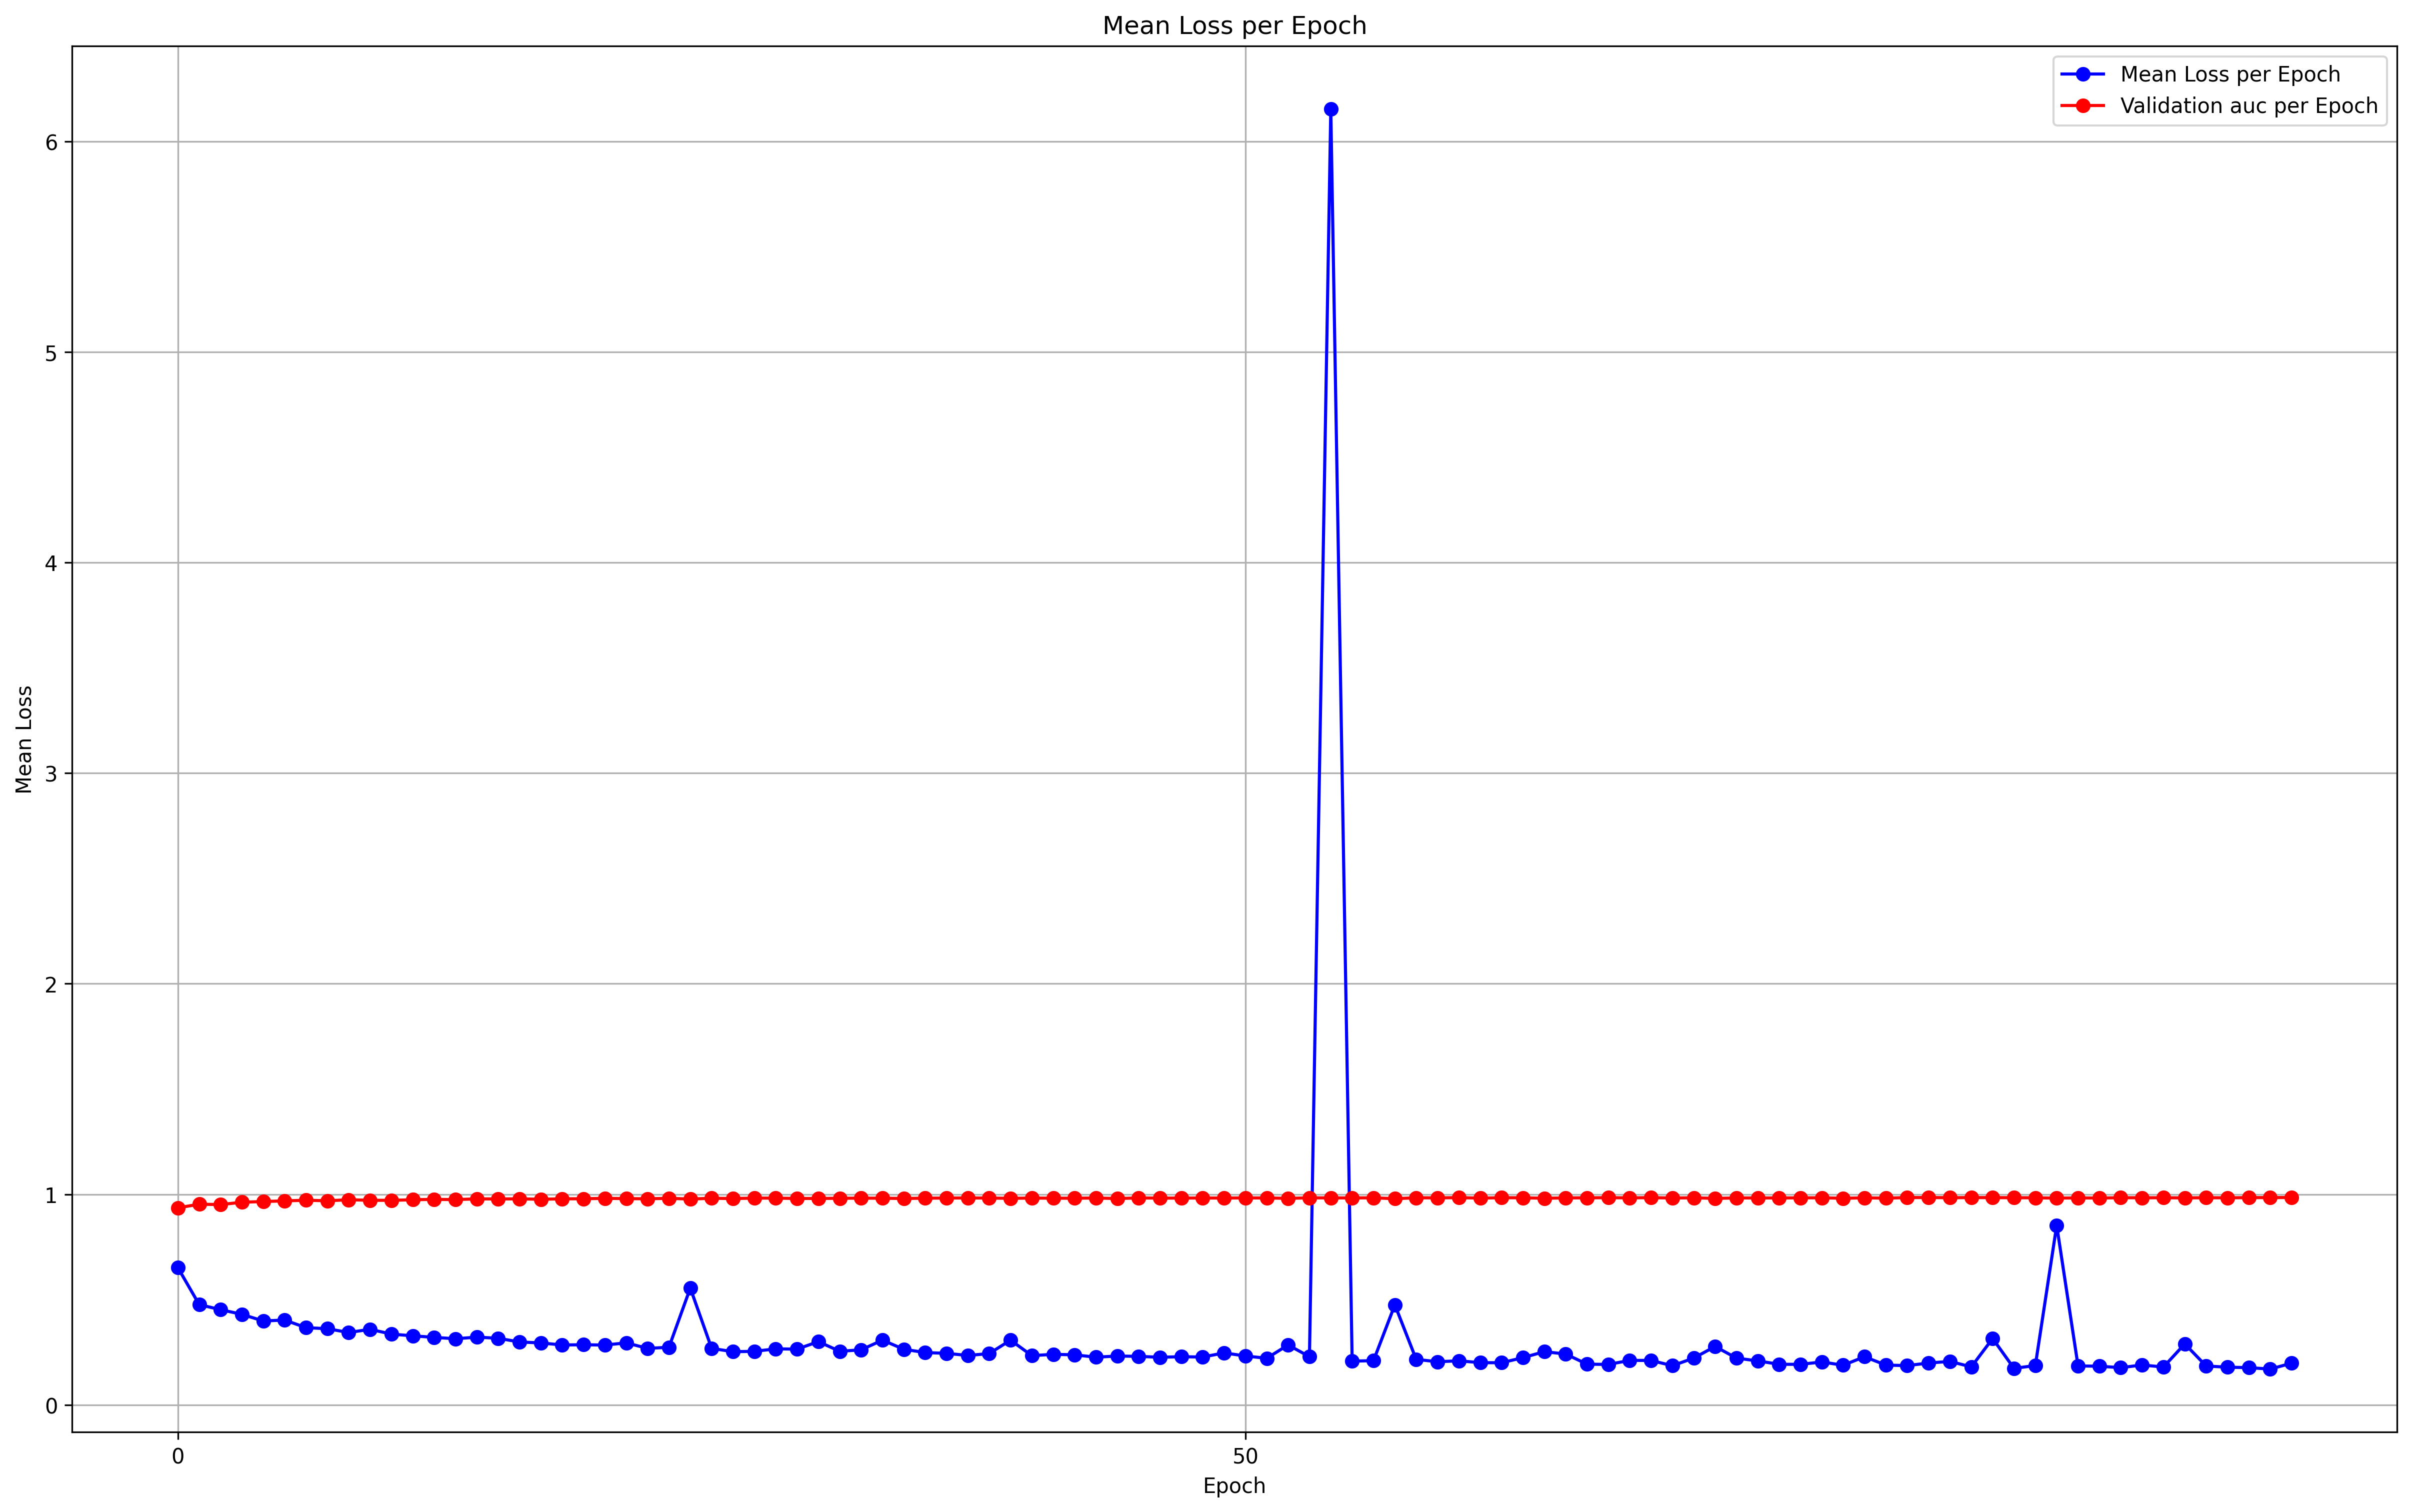

In [23]:
import re
import matplotlib.pyplot as plt

with open('checkpoints/att/Target/Target_1_model/verbose.log', 'r')as f:
    epoch_losses = {}
    auc_list = []
    current_epoch = None
    for line in f.readlines():
        epoch_match = re.match(r'Epoch (\d+)', line)
        loss_match = re.match(r'Loss = ([-+]?[0-9]*\.?[0-9]+[eE][-+]?[0-9]+)', line)
        auc_match = re.match(r'Validation auc = ([0-9]+\.[0-9]+)', line)
        if epoch_match:
            current_epoch = int(epoch_match.group(1))
            epoch_losses[current_epoch] = []
        elif loss_match and current_epoch is not None:
            try:
                epoch_losses[current_epoch].append(float(loss_match.group(1)))
            except ValueError:
                print('Error parsing loss value on line: {}'.format(line), f'##########{loss_match.group(1)}')
            if float(loss_match.group(1)) > 10:
                print('############',loss_match.group(1), float(loss_match.group(1)))
        elif auc_match is not None:
            auc_list.append(float(auc_match.group(1)))
            

epochs = []
mean_losses = []

for epoch, losses in epoch_losses.items():
    mean_loss = sum(losses) / len(losses)
    epochs.append(epoch)
    mean_losses.append(mean_loss)
    
# 绘制每个Epoch的平均Loss值
last_epoch_losses = epochs[:-1]
print(len(auc_list), len(epoch_losses), auc_list)
plt.figure(figsize=(20, 12),dpi=300)
plt.plot(epochs, mean_losses, marker='o', linestyle='-', color='b', label='Mean Loss per Epoch')
plt.plot(epochs, auc_list, marker='o', linestyle='-', color='r', label='Validation auc per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Mean Loss')
plt.title('Mean Loss per Epoch')
plt.legend()
plt.grid(True)

# 设置X轴的刻度间隔为10
plt.xticks(range(0, len(last_epoch_losses), 50))

plt.show()